<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Files, Folders & OS (Need)</span></div>

# What to expect in this chapter

In [ ]:
# How Python can interact with the operating system (os). 

# 1 Important concepts

In [ ]:
# Folder and directory mean the same thing.

## 1.1 Path

In [ ]:
# A path is a way (literally a way you can follow) to locate a file in your computer. 
# There are two types of paths: absolute and relative. 
# A absolute path is a unique address of a file inside your computer. 
# A relative path is an address relative to your current directory that you can use to locate a file. 
# This is an example of an absolute path:

In [ ]:
C:\\Users\Chammika\Desktop\data-01.txt    # In Windows.

In [ ]:
/Users/chammika/Desktop/data-01.txt    # An absolute path in MacOS.

## 1.2 More about relative paths

In [ ]:
# These are examples of relative paths:
.\data-files\data-01.txt
..\data-files\data-01.txt

In [ ]:
# Notice the difference between '.' and '..'. 
# ./ tells the program to look for the file from the current directory. 
# ../ tells the program to go up to the parent directory (previous folder) before looking for the file. 

### macOS or Linux

In [ ]:
# In both Linux and MacOS, '~' means home directory (ie, /home/user).

## 1.3 Path separator

In [ ]:
# For path separator, MacOS and Linux uses '/' while Windows uses '\'. 
# Examples are given above.

## 1.4 Text files vs. Binary files

In [ ]:
# There are two types of files. 
# Text files are those that we can open and read directly. Examples of text files include .txt and .csv files. 
# Binary files are coded files that can only be read after ran by an OS. Examples of binary files include raw .png.
# The file format for binary files need to be compatible with the OS for it to run successfully.

## 1.5 Extensions

In [ ]:
# Extensions are the last part in a file's name. It is the essentially the instruction telling OS how this file \
#     should be processed. 

# 2 Opening and closing files

## 2.1 Reading data

In [ ]:
# open() command opens up a local file. 
with open('spectrum-01.txt', 'r') as file:    # The use of with command is convenient because it takes care of \
                                              #    closing of file automatically as well (crucial in saving memory).
    file_content = file.read()

print(file_content)

In [ ]:
# 'r' specifies that the mode we want to open the file with is 'read'.

## 2.2 Writing data

In [1]:
# Let's say we want to write the following text into a newly created txt file. 
text = 'Far out in the uncharted backwaters of the unfashionable end of the western spiral arm of the Galaxy lies a small unregarded yellow sun.\nOrbiting this at a distance of roughly ninety-two million miles is an utterly insignificant little blue green planet whose ape-descended life forms are so amazingly primitive that they still think digital watches are a pretty neat idea.'

### Writing to a file in one go

In [ ]:
with open('my-text-once.txt', 'w') as file: # Notice that we have 'w' for 'write' this time.
    file.write(text)                        # If there exists no file under the name 'my-text-once.txt', a new \
                                            #     file of that name will be created. 

### Writing to a file, line by line

In [ ]:
with open('my-text-lines.txt', 'w') as file:
    for line in text.splitlines():    # splitlines() function splits our text by individual sentences.
        file.writelines(line)         # writelines() command write in the file line by line.
                                      # This process of writing into a file is generally slow.

# 3 Some useful packages

In [ ]:
# os, glob, and shutil are all useful packages. 
# They each serves the following functions:

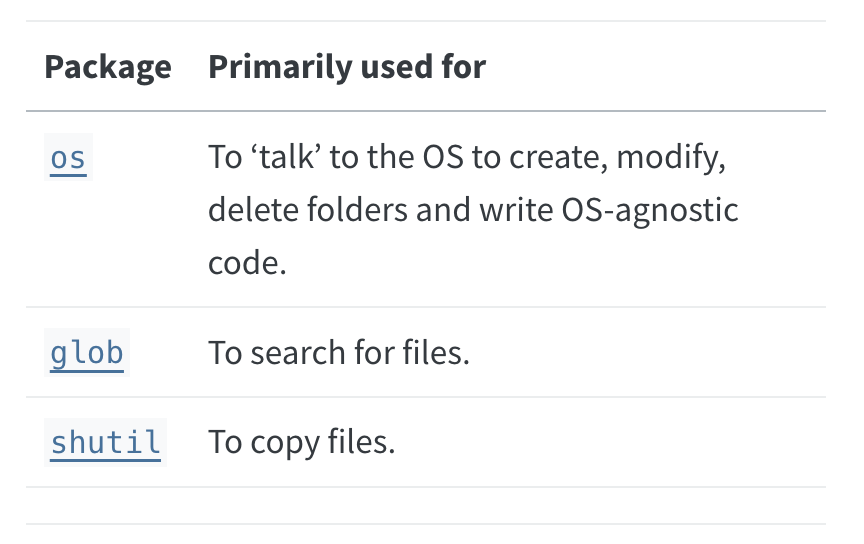

In [18]:
# Now we import them in once and for all.
import os
import glob
import shutil 
# As a gentle reminder, packages in Python must be imported one by one.

# 4 OS safe paths

In [3]:
# os.path.join is a powerful function that joins together different segments of a file directory.
# os.path.join automatically fills in the correct path separator depending on the OS you are running. 
path = os.path.join('.', 'all-data', 'sg-data', 'data-01.txt')
print(path)

./all-data/sg-data/data-01.txt


# 5 Folders

## 5.1 Creating folders

In [ ]:
# os.mkdir (stands for 'make directory') creates new folder with the assigned name. 

os.mkdir('people')    # OS is NOT case-sensitive. Hence if this line does not work, then os.makdir('People') will \
                      #     also not work.

for person in ['John', 'Paul', 'Ringo']:
    path = os.path.join('people', person)
    print(f'Creating {path}')
    os.mkdir(path)

## 5.2 Checking for existence

### Using try-except

In [ ]:
# However, if the file/folder you want to create already existed (under the same name), Python will raise \
#     FileExistsError. As always, to check for existance and circumvent such error, we can use a try-except block.
for person in ['John', 'Paul', 'Ringo']:
    path = os.path.join('people', person)
    try:
        os.mkdir(path)
        print(f'Creating {path}')
    except FileExistsError:
        print(f'{path} already exists; skipping creation.')

### Using os.path.exists()

In [ ]:
# Alternatively, os also provides a built-in function that checks for files' existences.
# The function that does the job is os.path.exists(). This is a Boolean function, it outputs only True or False.
for person in ['John', 'Paul', 'Ringo']:
    path = os.path.join('people', person)
    if os.path.exists(path):
        print(f'{path} already exists; skipping creation.')
    else:
        os.mkdir(path)
        print(f'Creating {path}')

## 5.3 Copying files

In [ ]:
# shutil provides a shutil.copy() function that can copy a file to a different directory. 
for person in ['John', 'Paul', 'Ringo']:
    path_to_destination = os.path.join('people', person)
    shutil.copy('sp2273_logo.png', path_to_destination)  # shutil.copy automatically returns the file's destination.
    print(f'Copied file to {path_to_destination}')

In [4]:
help(shutil.copy)

Help on function copy in module shutil:

copy(src, dst, *, follow_symlinks=True)
    Copy data and mode bits ("cp src dst"). Return the file's destination.
    
    The destination may be a directory.
    
    If follow_symlinks is false, symlinks won't be followed. This
    resembles GNU's "cp -P src dst".
    
    If source and destination are the same file, a SameFileError will be
    raised.



In [ ]:
# shutil also provides shutil.move() function that can move an existing file to a different directory.
for person in ['John', 'Paul', 'Ringo']:
    # Create folder 'imgs'
    path_to_imgs = os.path.join('people', person, 'imgs')
    if not os.path.exists(path_to_imgs):
        os.mkdir(path_to_imgs)

    # Move logo file
    current_path_of_logo = os.path.join('people', person, 'sp2273_logo.png')
    new_path_of_logo = os.path.join('people', person, 'imgs', 'sp2273_logo.png')

    shutil.move(current_path_of_logo, new_path_of_logo)  # Again, shutil.move returns files' new directory.
    print(f'Moved logo to {new_path_of_logo}')

In [5]:
help(shutil.move)

Help on function move in module shutil:

move(src, dst, copy_function=<function copy2 at 0x104f63560>)
    Recursively move a file or directory to another location. This is
    similar to the Unix "mv" command. Return the file or directory's
    destination.
    
    If the destination is a directory or a symlink to a directory, the source
    is moved inside the directory. The destination path must not already
    exist.
    
    If the destination already exists but is not a directory, it may be
    overwritten depending on os.rename() semantics.
    
    If the destination is on our current filesystem, then rename() is used.
    Otherwise, src is copied to the destination and then removed. Symlinks are
    recreated under the new name if os.rename() fails because of cross
    filesystem renames.
    
    The optional `copy_function` argument is a callable that will be used
    to copy the source or it will be delegated to `copytree`.
    By default, copy2() is used, but any function

# 6 Listing and looking for files

In [ ]:
# glob offers convenient ways to search for files. 
glob.glob('*')  # '*' searches for everything. If no directory specified, then by default Python looks at the 
                #     current directory.

In [6]:
help(glob.glob)

Help on function glob in module glob:

glob(pathname, *, root_dir=None, dir_fd=None, recursive=False, include_hidden=False)
    Return a list of paths matching a pathname pattern.
    
    The pattern may contain simple shell-style wildcards a la
    fnmatch. Unlike fnmatch, filenames starting with a
    dot are special cases that are not matched by '*' and '?'
    patterns by default.
    
    If `include_hidden` is true, the patterns '*', '?', '**'  will match hidden
    directories.
    
    If `recursive` is true, the pattern '**' will match any files and
    zero or more directories and subdirectories.



In [ ]:
glob.glob('peo*')   # Python looks for all files whose name matches the first three characters. 

In [ ]:
glob.glob('peo*/*')   # Python looks for files inside every folder whose name matches the first three characters.

In [ ]:
glob.glob('people/**', recursive=True)   # Python looks for all sub-directories (indicated by '**') under 'people'. 
                                         # When it hits the bottom level, it recurses back and down another folder.

In [ ]:
glob.glob('people/**/*.png', recursive=True)  # Python looks for all .png files in all sub-directories of 'people'.

# 7 Extracting file info

In [10]:
path = 'people/Ringo/imgs/sp2273_logo.png'
filename = path.split(os.path.sep)[-1]   # os.path.sep is the path separator '/'. This line basically splits up \
                                         #     the path by '/'. Since path is a str, str.split returns a list.
                                         # The last element in that list is the name of the file: sp2273_logo.png
extension = filename.split('.')[-1]      # To separate the extension from the name of file, separate the filename \
                                         #     by '.'. Again, the last element is the extension, and the first \
                                         #     element in the list the actual name of the file.
print(filename, extension)

sp2273_logo.png png


In [13]:
# os also provides special functions that perform the same job. 
# os.path.split splits the parent directory and the filename of a file and groups them into a tuple.
os.path.split(path)      # Split filename from the rest

('people/Ringo/imgs', 'sp2273_logo.png')

In [14]:
print(type(os.path.split(path)))

<class 'tuple'>


In [15]:
# os.path.splitext splits the extension and the rest of a file and groups them into a tuple.
os.path.splitext(path)   # Split extension

('people/Ringo/imgs/sp2273_logo', '.png')

In [16]:
# os.path.dirname returns the parent directory of a file.
os.path.dirname(path)    # Show the directory

'people/Ringo/imgs'

# 8 Deleting stuff

In [ ]:
# Both os and shutil provide ways to remove/delete a file or a folder. 
# os.remove removes a file (not a folder).
os.remove('people/Ringo/imgs/sp2273_logo.png')

In [ ]:
# os.rmdir (stands for 'remove directory') removes an empty directory. 
# Note that this directory must be empty, otherwise, an OsError will be raise.
os.rmdir('people/Ringo')

In [ ]:
# To remove an non-empty directory, shutil.rmtree (stands for 'remove tree') could be used.
shutil.rmtree('people/Ringo')

In [23]:
directory = input('Please enter the directory you want to remove: ')
confirmation = input(f'Are you sure you want to remove the directory {directory}: ')
if confirmation.lower() == 'yes':
    shutil.rmtree(directory)

Please enter the directory you want to remove: /Users/jiaruijin/Desktop/untitled folder
Are you sure you want to remove the directory /Users/jiaruijin/Desktop/untitled folder: yes


In [17]:
help(os.rmdir)

Help on built-in function rmdir in module posix:

rmdir(path, *, dir_fd=None)
    Remove a directory.
    
    If dir_fd is not None, it should be a file descriptor open to a directory,
      and path should be relative; path will then be relative to that directory.
    dir_fd may not be implemented on your platform.
      If it is unavailable, using it will raise a NotImplementedError.

